In [ ]:
# KNN & PCA – Theoretical Part

---

### 1. What is K-Nearest Neighbors (KNN) and how does it work?
KNN is a **supervised learning algorithm** used for classification and regression. It works by finding the **K nearest data points** to a query point and **predicting the label** (classification) or **average value** (regression) based on those neighbors. It’s a **lazy learner**, meaning it stores the training data and performs computation at the time of prediction.

---

### 2. What is the difference between KNN Classification and KNN Regression?
- **KNN Classification**: Predicts a **class label** using majority voting.
- **KNN Regression**: Predicts a **continuous value** using the average (or weighted average) of the K neighbors.

---

### 3. What is the role of the distance metric in KNN?
Distance metrics (e.g., **Euclidean**, **Manhattan**) define how closeness is measured. The choice of metric affects which neighbors are selected and the final prediction accuracy.

---

### 4. What is the Curse of Dimensionality in KNN?
In high-dimensional spaces, distances between data points become less meaningful. This makes it harder for KNN to identify relevant neighbors, reducing model accuracy.

---

### 5. How can we choose the best value of K in KNN?
Use:
- **Cross-validation**
- **Elbow method** (plotting accuracy vs. K)

A smaller K increases variance; a larger K increases bias.

---

### 6. What are KD Tree and Ball Tree in KNN?
These are **data structures** to speed up neighbor searches:
- **KD Tree**: Efficient for low-dimensional data.
- **Ball Tree**: Better suited for high-dimensional or irregular data.

---

### 7. When should you use KD Tree vs. Ball Tree?
- **KD Tree**: When dimensionality is low (typically < 20).
- **Ball Tree**: For high-dimensional or non-axis-aligned data.

---

### 8. What are the disadvantages of KNN?
- **Slow** during prediction
- **Sensitive to irrelevant features and outliers**
- **Poor performance in high dimensions**
- Needs **feature scaling**

---

### 9. How does feature scaling affect KNN?
KNN relies on distances. Features with larger ranges can dominate unless scaled. Scaling ensures fair contribution of all features.

---

### 10. What is PCA (Principal Component Analysis)?
PCA is a **dimensionality reduction** technique that transforms correlated features into a set of uncorrelated **principal components** ordered by the variance they capture.

---

### 11. How does PCA work?
1. Standardize the data
2. Compute the **covariance matrix**
3. Extract **eigenvectors** and **eigenvalues**
4. Select top k components
5. **Project data** onto the new space

---

### 12. What is the geometric intuition behind PCA?
PCA finds new axes (directions) in the data that **maximize variance**. It projects the data onto these axes to capture the most important structure.

---

### 13. What is the difference between Feature Selection and Feature Extraction?
- **Feature Selection**: Chooses a subset of original features.
- **Feature Extraction**: Creates new features from combinations of existing ones (e.g., PCA).

---

### 14. What are Eigenvalues and Eigenvectors in PCA?
- **Eigenvectors**: Define the new axes (principal components).
- **Eigenvalues**: Indicate how much variance is captured by each component.

---

### 15. How do you decide the number of components to keep in PCA?
Use:
- **Explained variance ratio**
- **Scree plot**
Choose components that explain a high percentage (e.g., 95%) of variance.

---

### 16. Can PCA be used for classification?
Yes, PCA can be used as a **preprocessing step** to reduce dimensionality before applying a classification algorithm. However, PCA itself does not classify.

---

### 17. What are the limitations of PCA?
- Assumes **linear relationships**
- Sensitive to **scaling and outliers**
- Principal components may lack interpretability
- May result in **information loss**

---

### 18. How do KNN and PCA complement each other?
PCA reduces dimensionality and noise, helping KNN overcome the **curse of dimensionality** and improving its accuracy.

---

### 19. How does KNN handle missing values in a dataset?
KNN can use **imputation**, where missing values are filled using the **average or mode** of K nearest neighbors (based on available data).

---

### 20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

| Aspect            | PCA                            | LDA                              |
|-------------------|----------------------------------|----------------------------------|
| Type              | Unsupervised                   | Supervised                       |
| Goal              | Maximize variance              | Maximize class separability      |
| Label usage       | No                             | Yes                              |
| Output            | Uncorrelated components        | Components that separate classes |


# Practical

In [2]:
# 21. Train a KNN Classifier on the Iris dataset and print model accuracy

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [4]:
# 22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

In [5]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 275.9503187423206


In [6]:
# 23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

In [8]:
# Euclidean distance (default)
knn_euclidean = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
predictions_euclidean = knn_euclidean.predict(X_test)
# Evaluate using a regression metric like Mean Squared Error (MSE)
mse_euclidean = mean_squared_error(y_test, predictions_euclidean)

# Manhattan distance
knn_manhattan = KNeighborsRegressor(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
predictions_manhattan = knn_manhattan.predict(X_test)
# Evaluate using MSE
mse_manhattan = mean_squared_error(y_test, predictions_manhattan)

print("Euclidean MSE:", mse_euclidean)
print("Manhattan MSE:", mse_manhattan)


Euclidean MSE: 236.59562405483047
Manhattan MSE: 236.59562405483047


In [9]:
# 24. Train a KNN Classifier with different values of K and visualize decision boundaries

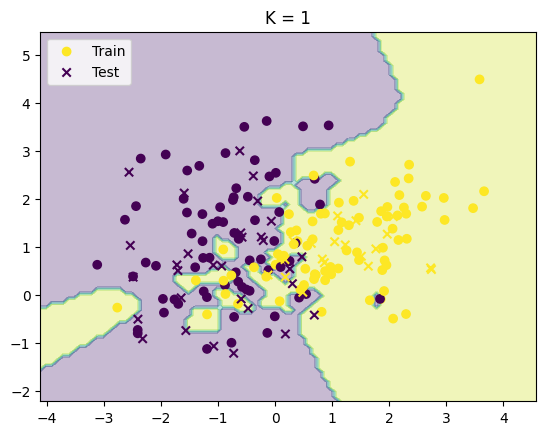

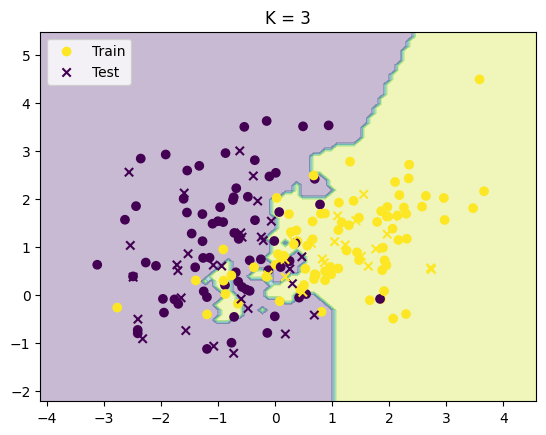

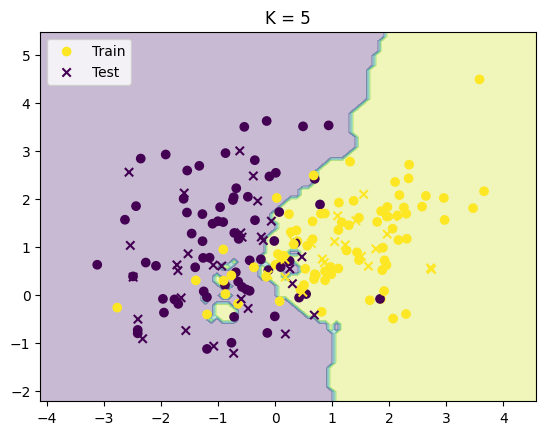

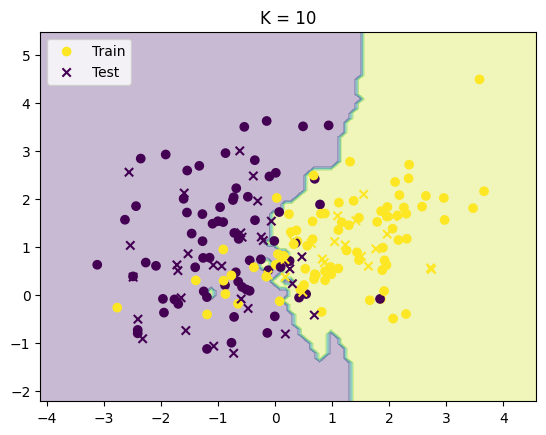

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Create a 2D classification dataset
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Decision boundary plot function
def plot_knn(k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    # Mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test')
    plt.title(f"K = {k}")
    plt.legend()
    plt.show()

# Try different K values
for k in [1, 3, 5, 10]:
    plot_knn(k)


In [10]:
# 25. Apply Feature Scaling before training a KNN model and compare results with unscaled data

In [12]:
from sklearn.preprocessing import StandardScaler

# Without scaling
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
acc_raw = accuracy_score(y_test, knn_raw.predict(X_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, knn_scaled.predict(X_test_scaled))

print("Accuracy without Scaling:", acc_raw)
print("Accuracy with Scaling:", acc_scaled)


Accuracy without Scaling: 0.9
Accuracy with Scaling: 0.92


In [13]:
# 26. Train a PCA model on synthetic data and print the explained variance ratio for each component

In [14]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Create synthetic data
X, y = make_classification(n_samples=200, n_features=5, random_state=42)

# Apply PCA
pca = PCA()
pca.fit(X)

# Explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio:
[4.81376676e-01 3.37198116e-01 1.81425208e-01 5.18289865e-17
 1.85374650e-17]


In [15]:
# 27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

In [16]:
# Without PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train, y_train)
acc_no_pca = accuracy_score(y_test, knn_no_pca.predict(X_test))

# With PCA (keep 2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca))

print("Accuracy without PCA:", acc_no_pca)
print("Accuracy with PCA:", acc_pca)


Accuracy without PCA: 0.9
Accuracy with PCA: 0.9


In [17]:
# 28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearch
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best Score: 0.8266666666666668


In [19]:
# 29. Train a KNN Classifier and check the number of misclassified samples

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

misclassified = (y_test != y_pred).sum()
print("Number of misclassified samples:", misclassified)


Number of misclassified samples: 5


In [21]:
# 30. Train a PCA model and visualize the cumulative explained variance

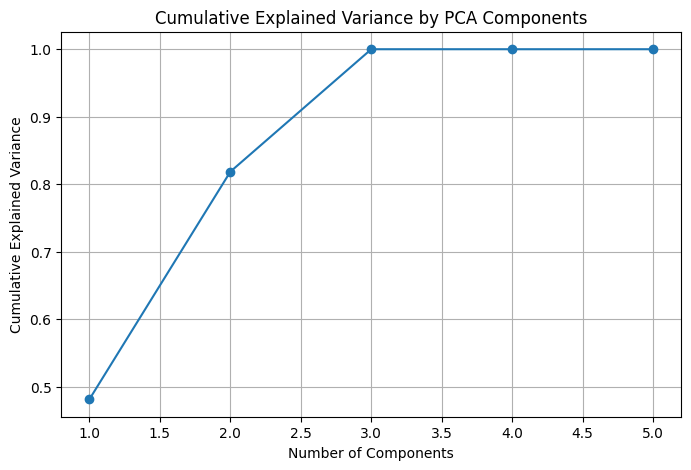

In [22]:
import matplotlib.pyplot as plt

pca = PCA().fit(X)

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [23]:
# 31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train, y_train)
acc_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

# Distance weights
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train, y_train)
acc_distance = accuracy_score(y_test, knn_distance.predict(X_test))

print("Accuracy (Uniform weights):", acc_uniform)
print("Accuracy (Distance weights):", acc_distance)


Accuracy (Uniform weights): 1.0
Accuracy (Distance weights): 1.0


In [25]:
# 32. Train a KNN Regressor and analyze the effect of different K values on performance

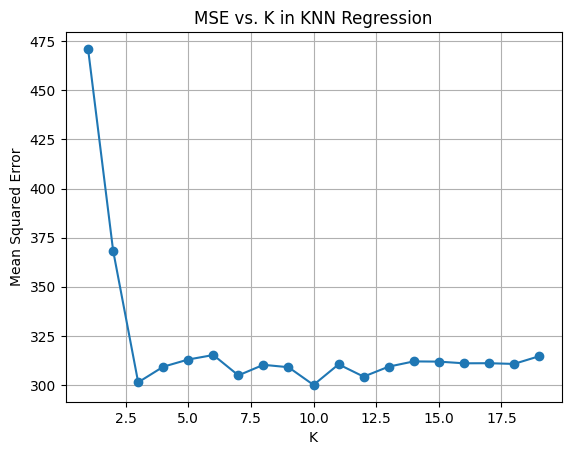

In [26]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create regression dataset
X, y = make_regression(n_samples=300, n_features=1, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k_values = range(1, 20)
mse_list = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

plt.plot(k_values, mse_list, marker='o')
plt.title('MSE vs. K in KNN Regression')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


In [27]:
# 33. Implement KNN Imputation for handling missing values in a dataset

In [28]:
import numpy as np
from sklearn.impute import KNNImputer

# Sample dataset with missing values
X_missing = np.array([[1, 2, np.nan],
                      [3, 4, 3],
                      [2, np.nan, 1],
                      [5, 3, 2]])

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=2)
X_filled = imputer.fit_transform(X_missing)

print("Original with missing values:\n", X_missing)
print("After KNN Imputation:\n", X_filled)


Original with missing values:
 [[ 1.  2. nan]
 [ 3.  4.  3.]
 [ 2. nan  1.]
 [ 5.  3.  2.]]
After KNN Imputation:
 [[1. 2. 2.]
 [3. 4. 3.]
 [2. 3. 1.]
 [5. 3. 2.]]


In [29]:
# 34. Train a PCA model and visualize the data projection onto the first two principal components

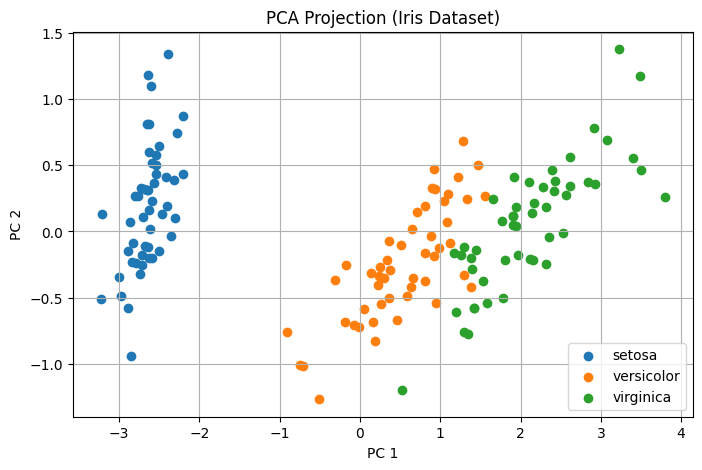

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8, 5))
for i in range(3):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=iris.target_names[i])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA Projection (Iris Dataset)')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# 35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# KD Tree
knn_kd = KNeighborsRegressor(algorithm='kd_tree', n_neighbors=5)
knn_kd.fit(X_train, y_train)
predictions_kd = knn_kd.predict(X_test)
mse_kd = mean_squared_error(y_test, predictions_kd)

# Ball Tree
knn_ball = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=5)
knn_ball.fit(X_train, y_train)
predictions_ball = knn_ball.predict(X_test)
mse_ball = mean_squared_error(y_test, predictions_ball)

print("KD Tree MSE:", mse_kd)
print("Ball Tree MSE:", mse_ball)


KD Tree MSE: 312.9377115571193
Ball Tree MSE: 312.9377115571193


In [36]:
# 36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot

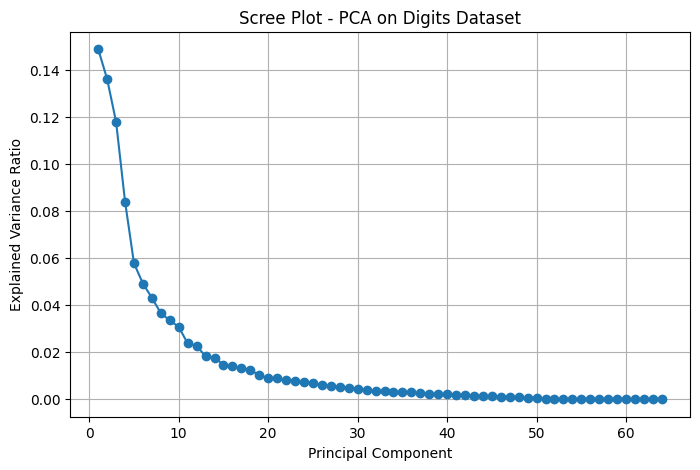

In [37]:
from sklearn.datasets import load_digits

# Load high-dimensional dataset (64 features)
digits = load_digits()
X_digits = digits.data

# Apply PCA
pca = PCA()
pca.fit(X_digits)

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot - PCA on Digits Dataset")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()


In [38]:
# 37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

In [40]:
from sklearn.metrics import mean_squared_error

# KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate regression
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 312.9377115571193


In [41]:
# 38. Train a PCA model and analyze the effect of different numbers of components on accuracy

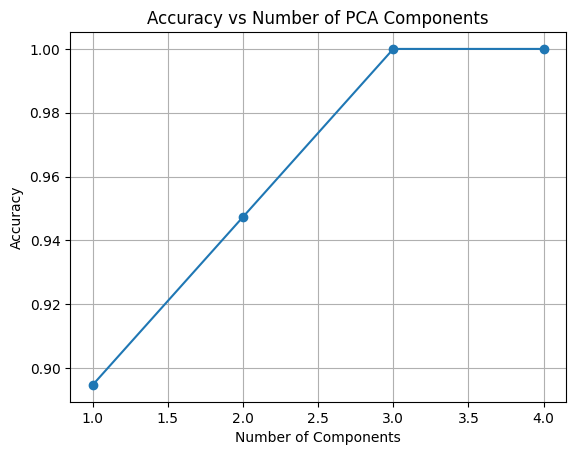

In [71]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Ensure data is scaled before applying PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dynamically determine the valid range for n_components
max_components = min(X_train.shape[0], X_train.shape[1])
components_range = range(1, max_components + 1)  # 1 to maximum allowable components
accuracies = []

for n in components_range:
    try:
        # Apply PCA
        pca = PCA(n_components=n)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train KNN classifier
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_pca, y_train)
        acc = accuracy_score(y_test, knn.predict(X_test_pca))
        accuracies.append(acc)

    except ValueError as e:
        print(f"Error with n_components={n}: {e}")
        break

# Plot results
plt.plot(components_range[:len(accuracies)], accuracies, marker='o')
plt.title("Accuracy vs Number of PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [48]:
# 39. Train a KNN Classifier with different leaf_size values and compare accuracy

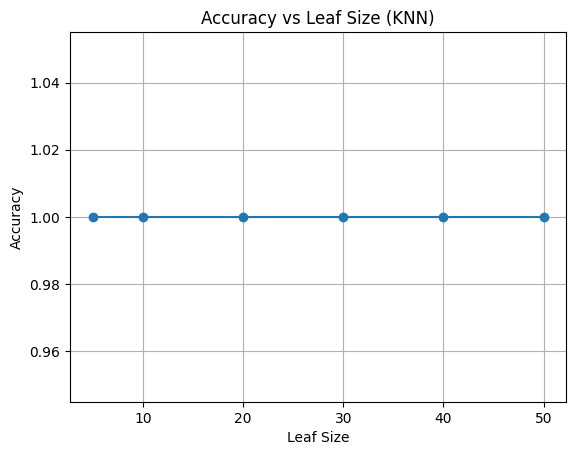

In [69]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Try different leaf_size values
leaf_sizes = [5, 10, 20, 30, 40, 50]
accuracies = []

for leaf in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    accuracies.append(acc)

# Plot results
plt.plot(leaf_sizes, accuracies, marker='o')
plt.title("Accuracy vs Leaf Size (KNN)")
plt.xlabel("Leaf Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [56]:
# 40. Train a PCA model and visualize how data points are transformed before and after PCA

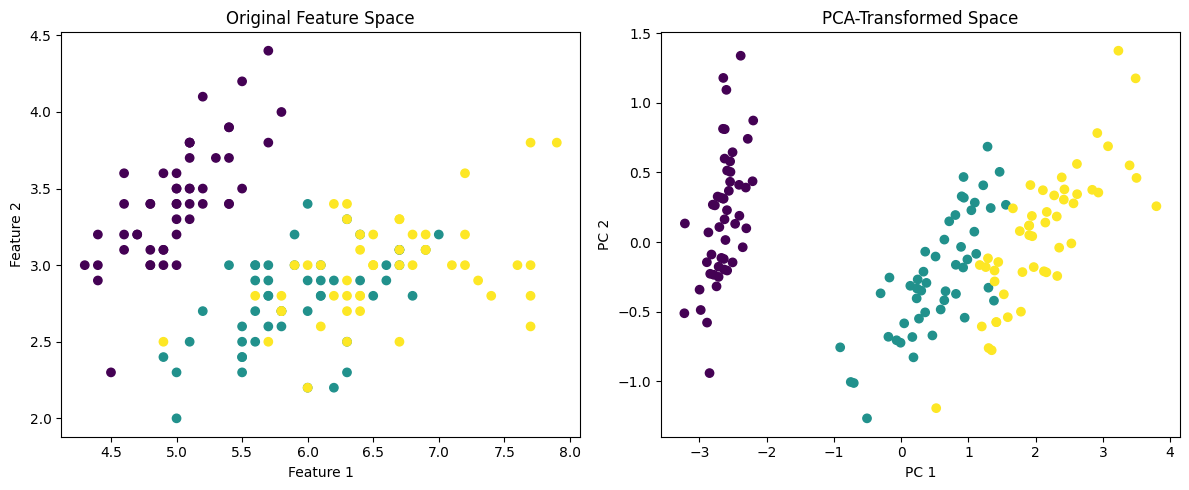

In [57]:
# Original data (first two features)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Original Feature Space")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# PCA-transformed data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("PCA-Transformed Space")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.tight_layout()
plt.show()


In [58]:
# 41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

In [59]:
from sklearn.datasets import load_wine

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train and evaluate
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred, target_names=wine.target_names))


              precision    recall  f1-score   support

     class_0       0.87      0.87      0.87        15
     class_1       0.72      0.72      0.72        18
     class_2       0.50      0.50      0.50        12

    accuracy                           0.71        45
   macro avg       0.70      0.70      0.70        45
weighted avg       0.71      0.71      0.71        45



In [60]:
# 42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error python

In [61]:
metrics = ['euclidean', 'manhattan', 'chebyshev']
for metric in metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE with {metric} distance: {mse:.2f}")


MSE with euclidean distance: 0.26
MSE with manhattan distance: 0.20
MSE with chebyshev distance: 0.28


In [62]:
# 43. Train a KNN Classifier and evaluate using ROC-AUC score

In [68]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Binarize the output labels
y_bin = label_binarize(y, classes=[0, 1, 2])

# Train-test split
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# KNN inside OneVsRest wrapper
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn.fit(X_train, y_train_bin)

# Predict probabilities
y_score = knn.predict_proba(X_test)

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
print("ROC-AUC Score (macro average):", roc_auc)


ROC-AUC Score (macro average): 1.0


In [64]:
# 44. Train a PCA model and visualize the variance captured by each principal component

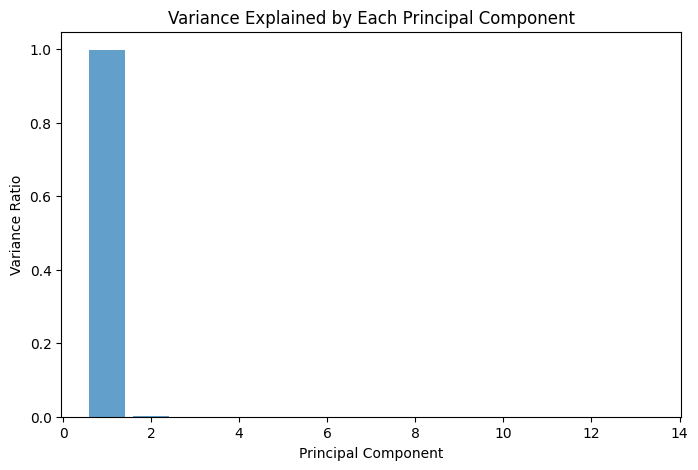

In [65]:
pca = PCA()
pca.fit(X)

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1),
        pca.explained_variance_ratio_, alpha=0.7)
plt.title("Variance Explained by Each Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.show()


In [66]:
# 45. Train a KNN Classifier and perform feature selection before training

In [67]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 2 features
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, random_state=42)

# Train and evaluate
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sel, y_train_sel)
y_pred = knn.predict(X_test_sel)

print("Accuracy after feature selection:", accuracy_score(y_test_sel, y_pred))


Accuracy after feature selection: 0.6888888888888889


In [72]:
# 46 Train a PCA model and visualize the data reconstruction error after reducing dimensions

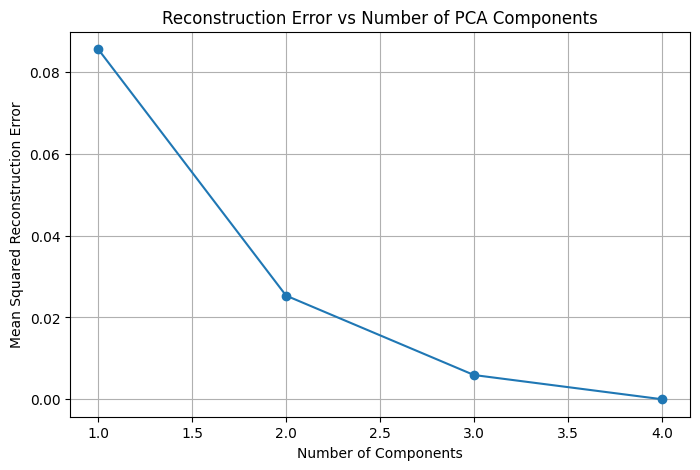

In [73]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data

components_range = range(1, X.shape[1] + 1)  # 1 to 4 for Iris
errors = []

for n in components_range:
    pca = PCA(n_components=n)
    X_reduced = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_reduced)
    
    mse = mean_squared_error(X, X_reconstructed)
    errors.append(mse)

# Plot reconstruction error
plt.figure(figsize=(8, 5))
plt.plot(components_range, errors, marker='o')
plt.title("Reconstruction Error vs Number of PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Mean Squared Reconstruction Error")
plt.grid(True)
plt.show()


In [74]:
#47: Train a KNN Classifier and visualize the decision boundary

C:\Users\adven\AppData\Local\Temp\ipykernel_22176\2583783935.py:32: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', label='Test')


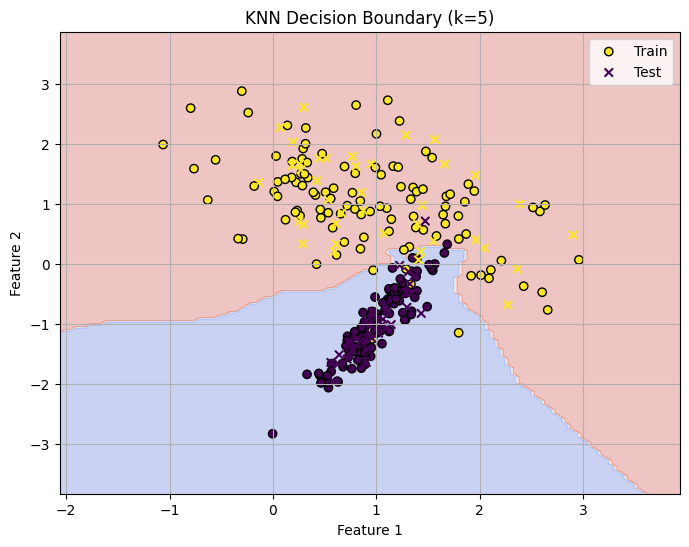

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Generate a 2D synthetic dataset
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create a meshgrid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict on the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', label='Test')
plt.title("KNN Decision Boundary (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [76]:
#48: Train a PCA model and analyze the effect of different numbers of components on data variance

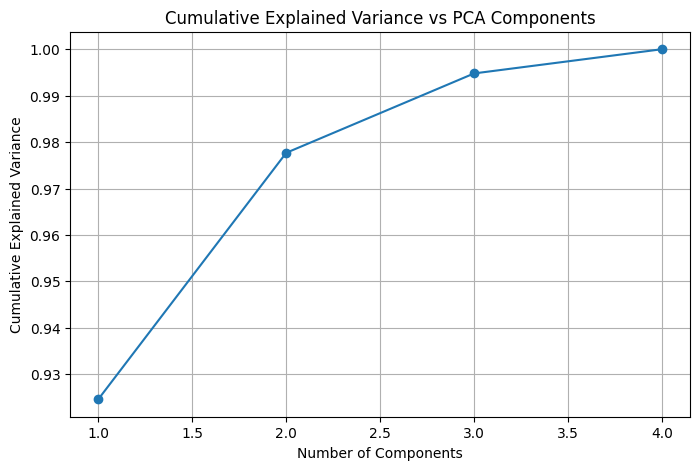

In [77]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load data
X = load_iris().data

# Train PCA
pca = PCA()
pca.fit(X)

# Cumulative variance
cum_var = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
plt.title("Cumulative Explained Variance vs PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()
